In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import peakutils
import sys
sys.path.append("../tools/")
from maths.algebra import *
plt.rcParams["font.size"] = 13

In [112]:
data = pd.read_csv('data.csv')

In [113]:
inter = interp1d(data["Temperature"], data["Intensity"], kind='cubic')

In [114]:
X = np.arange(306, 418, 0.1)
Y = inter(X)

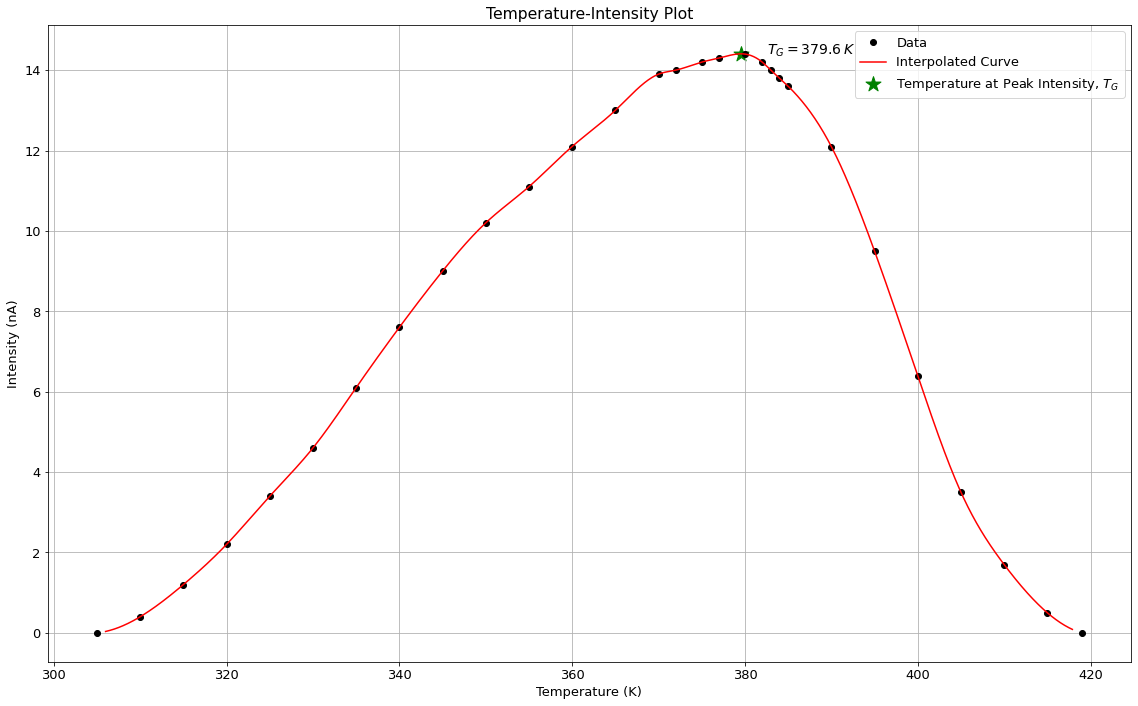

In [115]:
tg = float(X[peakutils.indexes(Y)])
tg_i = float(Y[peakutils.indexes(Y)])
plt.figure(figsize=(16,10))
plt.plot(data["Temperature"], data["Intensity"], "ok", label="Data")
plt.plot(X, Y,label="Interpolated Curve", color="red")
plt.scatter(tg, tg_i,s=250, label="Temperature at Peak Intensity, $T_G$", color="green", marker="*")
plt.xlabel("Temperature (K)")
plt.ylabel("Intensity (nA)")
plt.legend()
plt.grid()
plt.annotate(f"$T_G = {tg:.1f} \: K$", (tg+3, tg_i), fontsize=14)
plt.title("Temperature-Intensity Plot")
plt.tight_layout()
plt.savefig("T-I.jpg")
plt.show()

In [129]:
data.to_html("data.html", index=False)

In [117]:
temp = pd.read_csv('temp.csv')

In [118]:
X_t = temp["t"]
Y_t = temp["T"]

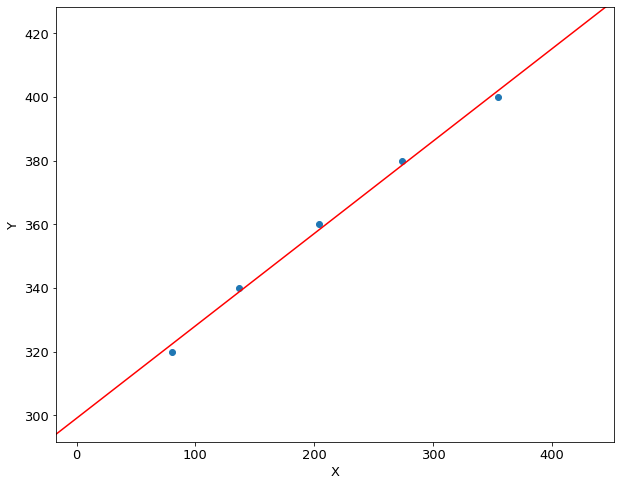

(array([2.99108597e+02, 2.89959060e-01]),
 {'r2': 0.9960093698560757, 'syx': 2.306694646436565})

In [119]:
cf = CurveFitting()
res = cf.fit(X_t, Y_t, order=1, plot=True, stats=True)
res

In [120]:
res[1]["r2"]

0.9960093698560757

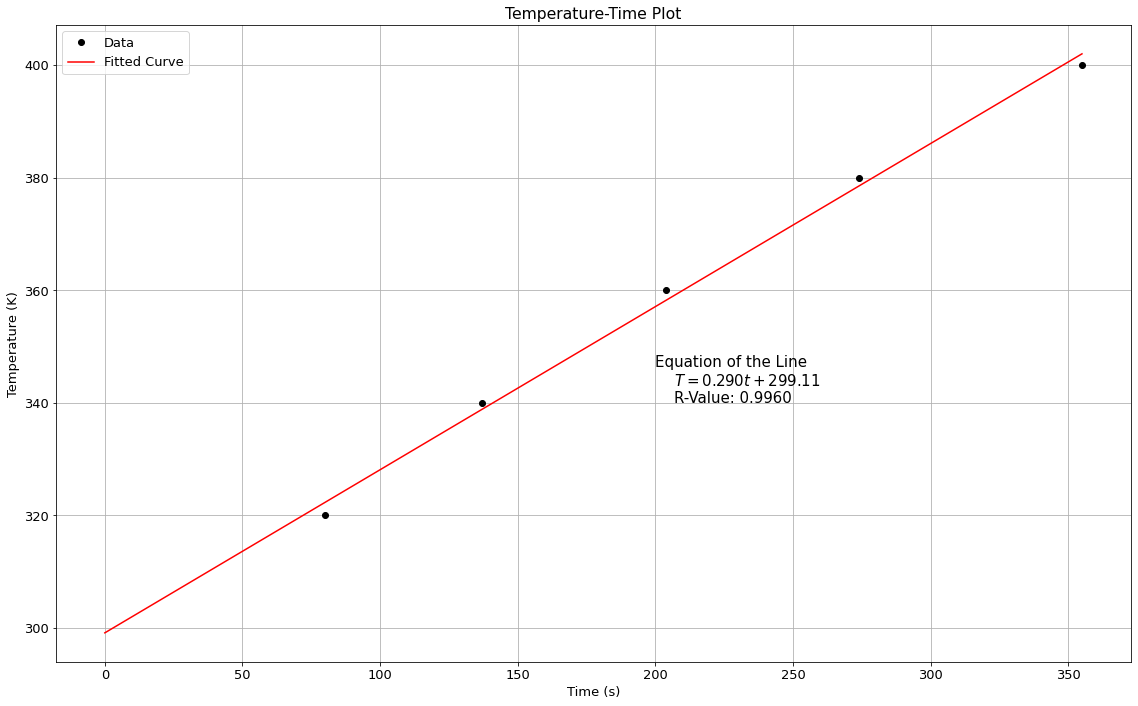

In [121]:
m = res[0][1]
c = res[0][0]
X = np.arange(0, max(X_t), 0.1)
Y = m*X + c
plt.figure(figsize=(16,10))
plt.plot(X_t, Y_t, "ok", label="Data")
plt.plot(X, Y, label="Fitted Curve", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.annotate(rf"""Equation of the Line
    $T = {m:.3f} t + {c:.2f}$
    R-Value: {res[1]["r2"]:.4f}""", (200, 340), fontsize=15)
plt.legend()
plt.grid()
plt.title("Temperature-Time Plot")
plt.tight_layout()
plt.savefig("T-t.jpg")
plt.show()

In [122]:
beta = m

In [123]:
tg

379.60000000001673

In [124]:
k = 8.6e-5
beta0 = 10e10

res = k*tg*np.log(beta0*tg/beta)
res

1.061163823890336

In [125]:
(res-1.05)/1.05*100

1.0632213228891418

In [126]:
beta0, tg, beta

(100000000000.0, 379.60000000001673, 0.28995905963786817)

In [127]:
np.log(beta0*tg/beta)

32.5055696293004

In [130]:
temp.to_html("temp.html", index=False)